In [1]:
pip install PyPDF2


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


## **Run to extract the file and its headnote and keeping it to different folders**

In [5]:
import os
from PyPDF2 import PdfReader
import shutil
import re

# Define input and output folders
input_folder = "Case_Files"
output_folder_text = "Judgment_Files"
output_folder_headnotes = "Reference_Summaries"

# Create output folders if they don't exist
os.makedirs(output_folder_text, exist_ok=True)
os.makedirs(output_folder_headnotes, exist_ok=True)

# Function to extract text and headnote from PDF file
def extract_text_and_headnote_from_pdf(pdf_path):
    pdf_reader = PdfReader(pdf_path)
    text = ""
    for page_num in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[page_num].extract_text()

    text=text.lower()

    act_search = re.search(r"act:(.*)", text, re.DOTALL | re.IGNORECASE)
    if act_search:
        act_text = act_search.group(1).strip()
    else:
        act_text = "Act section not found."

    # Extract headnote using regular expression pattern
    headnote_search = re.search(r"headnote:(.*?)judgment:", text, re.DOTALL | re.IGNORECASE)
    if headnote_search:
        # Extract the headnote and remove leading/trailing spaces
        headnote = headnote_search.group(1).strip()
    else:
        headnote = "Headnote not found."

    # Remove any text that includes "indian kanoon" followed by a link
    act_text = re.sub(r"indian kanoon - http://indiankanoon\.org/.*?\n", "", act_text, flags=re.IGNORECASE)
    headnote = re.sub(r"indian kanoon - http://indiankanoon\.org/.*?\n", "", headnote, flags=re.IGNORECASE)


    return act_text, headnote

# Iterate through PDF files in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(".pdf"):
        pdf_path = os.path.join(input_folder, filename)
        # Extract text and headnote from the PDF
        extracted_text, headnote = extract_text_and_headnote_from_pdf(pdf_path)

        # Write extracted text to the output text folder
        output_text_path = os.path.join(output_folder_text, f"{len(os.listdir(output_folder_text)) + 1}.txt")
        with open(output_text_path, "w", encoding="utf-8") as output_file:
            output_file.write(extracted_text)

        # Write headnote to the output headnotes folder
        output_headnote_path = os.path.join(output_folder_headnotes, f"{len(os.listdir(output_folder_headnotes)) + 1}.txt")
        with open(output_headnote_path, "w", encoding="utf-8") as headnote_output_file:
            headnote_output_file.write(headnote)

print("Extraction completed.")



Extraction completed.


 **Word_Count in  Each Judgement and Reference Summary files**

In [11]:
import os
import pandas as pd
import re

# Paths to the folders containing judgment and summary files
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

def count_words_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        return len(words)

def count_words_in_folder(folder_path):
    word_counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count = count_words_in_file(file_path)
            word_counts[filename] = word_count
    return word_counts

# Counting words in judgment files
judgment_word_counts = count_words_in_folder(judgment_folder)

# Counting words in summary files
summary_word_counts = count_words_in_folder(summary_folder)

# Creating a list of filenames (common to both folders)
all_files = list(set(judgment_word_counts.keys()).union(set(summary_word_counts.keys())))

# Collecting data for the table
data = []
for file in all_files:
    judgment_count = judgment_word_counts.get(file, 0)  # Default to 0 if no judgment file
    summary_count = summary_word_counts.get(file, 0)    # Default to 0 if no summary file
    data.append([file, judgment_count, summary_count])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=['File Name', 'No of words in Judgement', 'No of Words in Headnote'])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))


File Name  No of words in Judgement  No of Words in Headnote
    1.txt                      3996                      798
    2.txt                     14805                     3109
    3.txt                     52039                    14641
    4.txt                      6626                     1145
    5.txt                      2743                      524
    6.txt                     42051                     3637
    7.txt                     21123                     4426
    8.txt                     89178                     8944
    9.txt                      1996                      282
   10.txt                      2846                      372
   11.txt                      2843                      496
   12.txt                      5943                     1222
   13.txt                      1201                      255
   14.txt                      8697                      658
   15.txt                      1985                      450


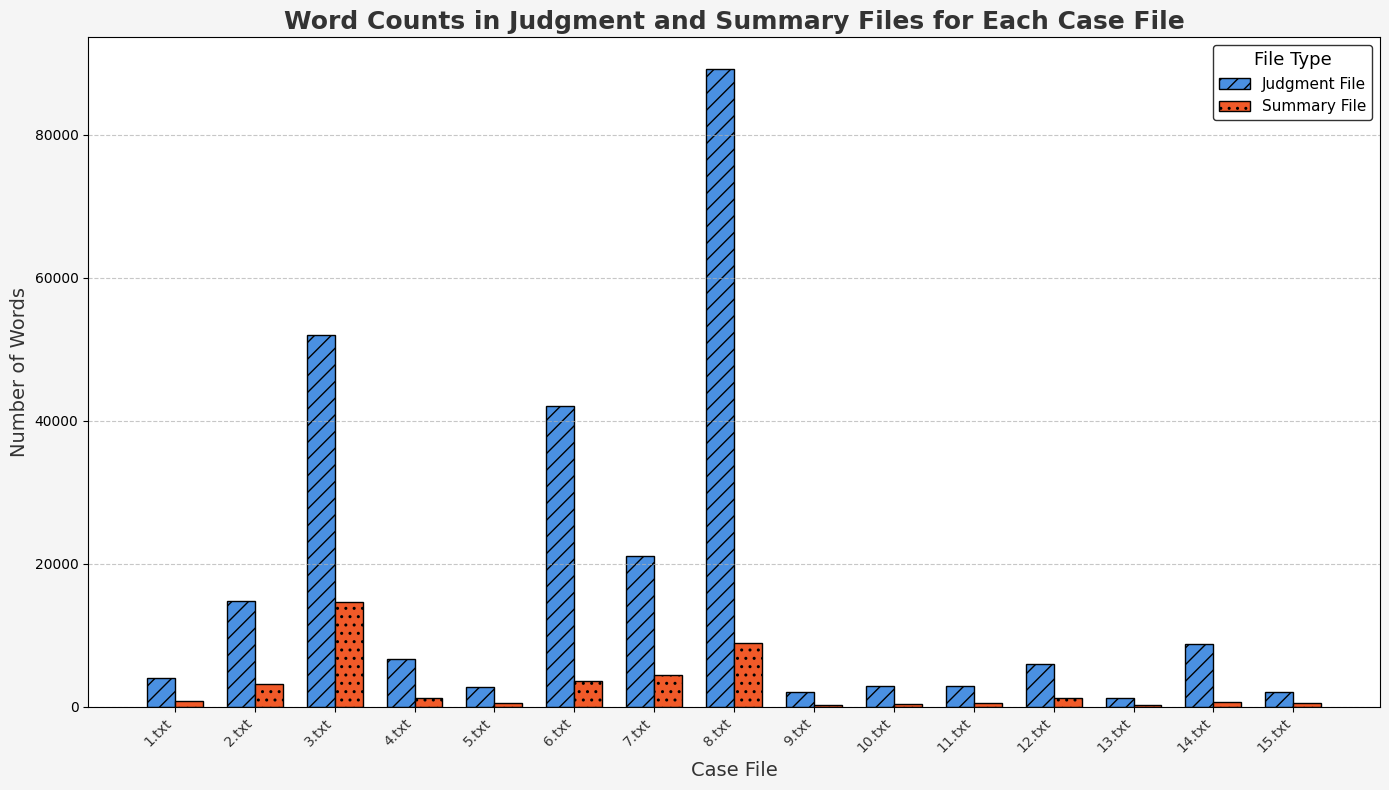

In [15]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Paths to the folders containing judgment and summary files
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

def count_words_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        return len(words)

def count_words_in_folder(folder_path):
    word_counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count = count_words_in_file(file_path)
            word_counts[filename] = word_count
    return word_counts

# Counting words in judgment files
judgment_word_counts = count_words_in_folder(judgment_folder)

# Counting words in summary files
summary_word_counts = count_words_in_folder(summary_folder)

# Creating a list of filenames (common to both folders)
all_files = list(set(judgment_word_counts.keys()).union(set(summary_word_counts.keys())))

# Collecting data for the table
data = []
for file in all_files:
    judgment_count = judgment_word_counts.get(file, 0)  # Default to 0 if no judgment file
    summary_count = summary_word_counts.get(file, 0)    # Default to 0 if no summary file
    data.append([file, judgment_count, summary_count])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=['File Name', 'Words in Judgment File', 'Words in Summary File'])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Plotting the grouped bar chart with enhanced styling
x = range(len(df))  # Positions for each file on the x-axis
width = 0.35        # Width of each bar

plt.figure(figsize=(14, 8), facecolor='#f5f5f5')  # Larger figure with light gray background

# Bar plots for judgment and summary word counts
plt.bar(
    [i - width/2 for i in x], df['Words in Judgment File'], width=width, 
    label='Judgment File', color='#4a90e2', edgecolor='black', hatch='//'
)
plt.bar(
    [i + width/2 for i in x], df['Words in Summary File'], width=width, 
    label='Summary File', color='#f15a29', edgecolor='black', hatch='..'
)

# Setting labels and title with custom fonts and colors
plt.xlabel('Case File', fontsize=14, color='#333333')
plt.ylabel('Number of Words', fontsize=14, color='#333333')
plt.title('Word Counts in Judgment and Summary Files for Each Case File', fontsize=18, fontweight='bold', color='#333333')

# Customizing x-axis labels
plt.xticks(x, df['File Name'], rotation=45, ha='right', fontsize=10, color='#333333')

# Adding a legend with custom styling
plt.legend(title="File Type", title_fontsize='13', fontsize='11', loc='upper right', facecolor='white', edgecolor='black')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Final adjustments
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


**Sentence Count for each judgement and headnote file**

In [16]:
import os
import pandas as pd
import re

# Paths to the folders containing judgment and summary files
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

def count_sentences_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Split text into sentences based on common sentence-ending punctuation
        sentences = re.split(r'[.!?]+', text)
        # Filter out empty strings resulting from split
        sentences = [s for s in sentences if s.strip()]
        return len(sentences)

def count_sentences_in_folder(folder_path):
    sentence_counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            sentence_count = count_sentences_in_file(file_path)
            sentence_counts[filename] = sentence_count
    return sentence_counts

# Counting sentences in judgment files
judgment_sentence_counts = count_sentences_in_folder(judgment_folder)

# Counting sentences in summary files
summary_sentence_counts = count_sentences_in_folder(summary_folder)

# Creating a list of filenames (common to both folders)
all_files = list(set(judgment_sentence_counts.keys()).union(set(summary_sentence_counts.keys())))

# Collecting data for the table
data = []
for file in all_files:
    judgment_sentences = judgment_sentence_counts.get(file, 0)  # Default to 0 if no judgment file
    summary_sentences = summary_sentence_counts.get(file, 0)    # Default to 0 if no summary file
    data.append([file, judgment_sentences, summary_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=['File Name', 'No of Sentences in Judgement', 'No of Sentences in Headnote'])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))



File Name  No of Sentences in Judgement  No of Sentences in Headnote
    1.txt                           254                           37
    2.txt                           542                          141
    3.txt                          1360                          383
    4.txt                           462                           82
    5.txt                           170                           32
    6.txt                          2366                          210
    7.txt                           954                          202
    8.txt                          3963                          448
    9.txt                           151                           24
   10.txt                           147                           21
   11.txt                           157                           33
   12.txt                           461                           98
   13.txt                            88                           17
   14.txt                         

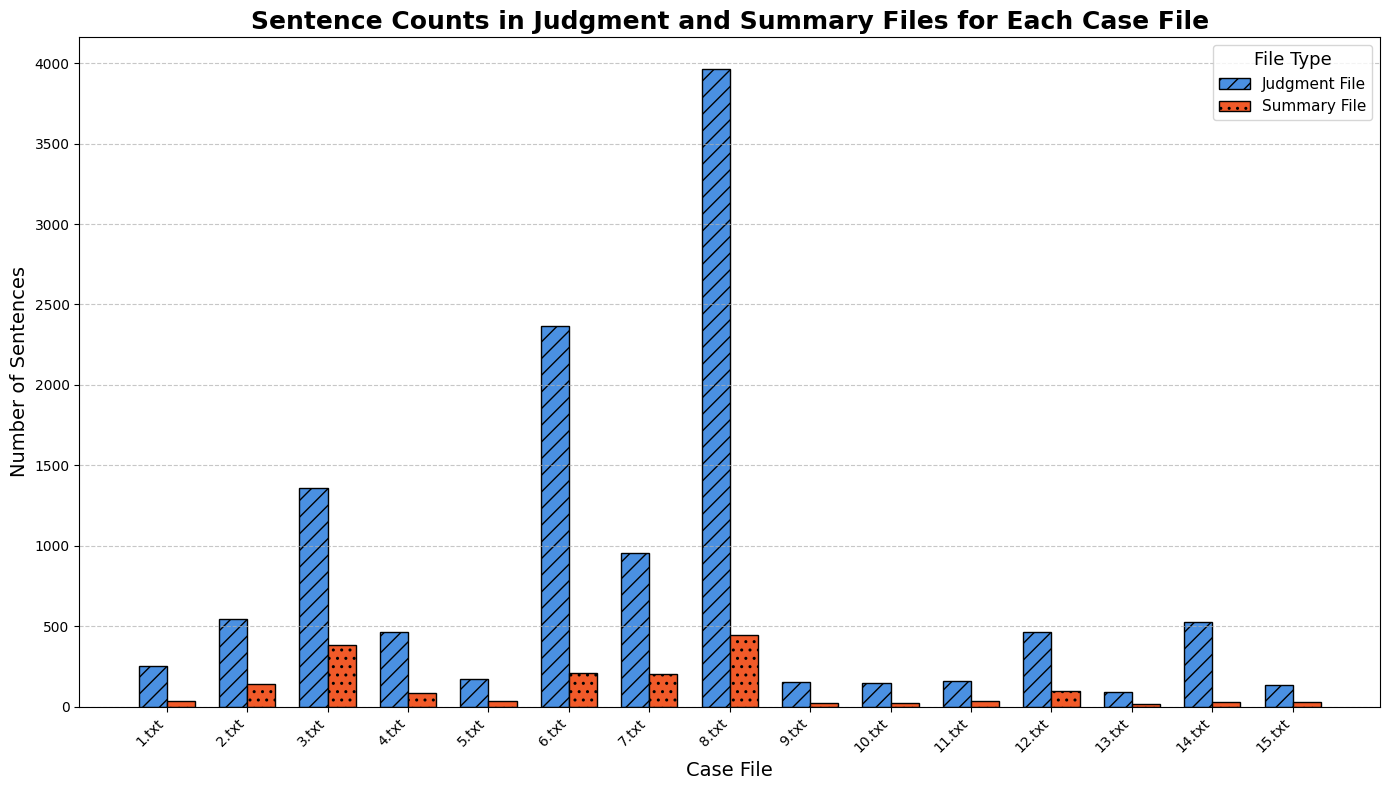

In [17]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

# Paths to the folders containing judgment and summary files
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

def count_sentences_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Split text into sentences based on common sentence-ending punctuation
        sentences = re.split(r'[.!?]+', text)
        # Filter out empty strings resulting from split
        sentences = [s for s in sentences if s.strip()]
        return len(sentences)

def count_sentences_in_folder(folder_path):
    sentence_counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            sentence_count = count_sentences_in_file(file_path)
            sentence_counts[filename] = sentence_count
    return sentence_counts

# Counting sentences in judgment files
judgment_sentence_counts = count_sentences_in_folder(judgment_folder)

# Counting sentences in summary files
summary_sentence_counts = count_sentences_in_folder(summary_folder)

# Creating a list of filenames (common to both folders)
all_files = list(set(judgment_sentence_counts.keys()).union(set(summary_sentence_counts.keys())))

# Collecting data for the table
data = []
for file in all_files:
    judgment_sentences = judgment_sentence_counts.get(file, 0)  # Default to 0 if no judgment file
    summary_sentences = summary_sentence_counts.get(file, 0)    # Default to 0 if no summary file
    data.append([file, judgment_sentences, summary_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=['File Name', 'No of Sentences in Judgement', 'No of Sentences in Headnote'])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Plotting the grouped bar chart
x = range(len(df))  # Positions for each file on the x-axis
width = 0.35        # Width of each bar

plt.figure(figsize=(14, 8))  # Larger figure size

# Bar plots for judgment and summary sentence counts
plt.bar(
    [i - width/2 for i in x], df['No of Sentences in Judgement'], width=width, 
    label='Judgment File', color='#4a90e2', edgecolor='black', hatch='//'
)
plt.bar(
    [i + width/2 for i in x], df['No of Sentences in Headnote'], width=width, 
    label='Summary File', color='#f15a29', edgecolor='black', hatch='..'
)

# Setting labels and title
plt.xlabel('Case File', fontsize=14)
plt.ylabel('Number of Sentences', fontsize=14)
plt.title('Sentence Counts in Judgment and Summary Files for Each Case File', fontsize=18, fontweight='bold')

# Customizing x-axis labels
plt.xticks(x, df['File Name'], rotation=45, ha='right', fontsize=10)

# Adding a legend
plt.legend(title="File Type", title_fontsize='13', fontsize='11', loc='upper right')

# Adding a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


## **InLegalbert**

In [6]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the InLegalBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("law-ai/InLegalBERT")
model = AutoModel.from_pretrained("law-ai/InLegalBERT")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using InLegalBERT
def generate_summary(text):
  tokenizer.max_len = model.config.max_position_embeddings

  # Encode the input text
  encoded_input = tokenizer(text, return_tensors="pt", truncation=True)
  output = model(**encoded_input)
  embeddings = output.pooler_output

# Making a summary using these embeddings
# Step 1: Compute sentence embeddings
  sentences = text.split('. ')  # Split text into sentences

# Calculate the desired number of sentences for the summary based on the percentage
  percentage = 0.15  # Adjust the desired percentage as needed
  num_sentences = int(len(sentences) * percentage)

  if len(sentences) < num_sentences:
      num_sentences = len(sentences)

  sentence_embeddings = []
  for sentence in sentences:
      encoded_input = tokenizer(sentence, return_tensors="pt", truncation=True)
      output = model(**encoded_input)
      sentence_embedding = output.pooler_output.squeeze(dim=0)
      sentence_embeddings.append(sentence_embedding.detach().numpy())

# Step 2: Compute similarity scores
  similarity_scores = []
  for i, embedding_i in enumerate(sentence_embeddings):
      similarity_scores_i = []
      for j, embedding_j in enumerate(sentence_embeddings):
          similarity = np.dot(embedding_i, embedding_j) / (
              np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
          )
          similarity_scores_i.append(similarity)
      similarity_scores.append(similarity_scores_i)

  similarity_scores = np.array(similarity_scores)

# Step 3: Select top sentences
  summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
  summary_indices.sort()
  summary_sentences = [sentences[i] for i in summary_indices]
  InLegal_summary = '. '.join(summary_sentences)
  return InLegal_summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'InLegalBert_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using InLegalBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)


    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'InLegal ROUGE-1': rouge1_scores,
    'InLegal ROUGE-2': rouge2_scores,
    'InLegal ROUGE-L': rougel_scores,
    'InLegal Precision': precision_scores,
    'InLegal Recall': recall_scores,
    'InLegal F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'InLegalBert_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.5)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")

tokenizer_config.json:   0%|          | 0.00/516 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/534M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/534M [00:00<?, ?B/s]

Evaluation metrics saved to InLegalBert_eval_results.xlsx
Average ROUGE-1 Score of InLegalBERT: 0.5411
Average ROUGE-2 Score of InLegalBERT: 0.3823
Average ROUGE-L Score of InLegalBERT: 0.5184
Overall Accuracy: 0.8667


## **Legal BERT**




In [8]:
pip install sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 127.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the LegalBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using LegalBERT
def generate_summary(text):
  tokenizer.max_len = model.config.max_position_embeddings

  # Encode the input text
  encoded_input = tokenizer(text, return_tensors="pt", truncation=True)
  output = model(**encoded_input)
  embeddings = output.pooler_output

  # Making a summary using these embeddings
  # Step 1: Compute sentence embeddings
  sentences = text.split('. ')  # Split text into sentences

  # Calculate the desired number of sentences for the summary based on the percentage
  percentage = 0.15  # Adjust the desired percentage as needed
  num_sentences = int(len(sentences) * percentage)

  if len(sentences) < num_sentences:
      num_sentences = len(sentences)

  sentence_embeddings = []
  for sentence in sentences:
      encoded_input = tokenizer(sentence, return_tensors="pt", truncation=True)
      output = model(**encoded_input)
      sentence_embedding = output.pooler_output.squeeze(dim=0)
      sentence_embeddings.append(sentence_embedding.detach().numpy())

  # Step 2: Compute similarity scores
  similarity_scores = []
  for i, embedding_i in enumerate(sentence_embeddings):
      similarity_scores_i = []
      for j, embedding_j in enumerate(sentence_embeddings):
          similarity = np.dot(embedding_i, embedding_j) / (
              np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
          )
          similarity_scores_i.append(similarity)
      similarity_scores.append(similarity_scores_i)

  similarity_scores = np.array(similarity_scores)

  # Step 3: Select top sentences
  summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
  summary_indices.sort()
  summary_sentences = [sentences[i] for i in summary_indices]
  Legal_summary = '. '.join(summary_sentences)
  return Legal_summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'LegalBert_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using LegalBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'Legal ROUGE-1': rouge1_scores,
    'Legal ROUGE-2': rouge2_scores,
    'Legal ROUGE-L': rougel_scores,
    'Legal Precision': precision_scores,
    'Legal Recall': recall_scores,
    'Legal F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'LegalBert_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of LegalBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of LegalBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of LegalBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.5)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Evaluation metrics saved to LegalBert_eval_results.xlsx
Average ROUGE-1 Score of LegalBERT: 0.4937
Average ROUGE-2 Score of LegalBERT: 0.3255
Average ROUGE-L Score of LegalBERT: 0.4630
Overall Accuracy: 0.6667


# Evaluation of InLegalBERT with LegalBERT:

In [16]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
legal_bert_generated_summary_folder = 'LegalBert_Generated_Summaries'

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_LegalBERT_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and Legal Pegasus
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    legal_bert_summary_file_path = os.path.join(legal_bert_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    legal_bert_summary = read_text_from_file(legal_bert_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and Legal Pegasus summaries
    rouge_scores = rouge.get_scores(inlegal_summary, legal_bert_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs LegalBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs LegalBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs LegalBERT: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_LegalBERT_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs LegalBERT: 0.5020
Average ROUGE-2 Score of InLegalBERT vs LegalBERT: 0.3266
Average ROUGE-L Score of InLegalBERT vs LegalBERT: 0.4697
Overall Accuracy (ROUGE-L >= 0.4): 0.7333


In [19]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
legal_bert_generated_summary_folder = 'LegalBert_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in LegalBERT-generated summaries
legalbert_counts = count_words_and_sentences_in_folder(legal_bert_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(legalbert_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    legalbert_words, legalbert_sentences = legalbert_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, legalbert_words, legalbert_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalB', 
    '#sentence_InLegalB', 
    '#word_InLegalB', 
    '#sentence_InLegalB'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))




File Name  #word_InLegalB  #sentence_InLegalB  #word_InLegalB  #sentence_InLegalB
    1.txt             722                  35             944                  41
    2.txt            3064                  81            2396                  84
    3.txt           10670                 219            7358                 192
    4.txt            1327                  75            1279                  75
    5.txt             541                  24             516                  22
    6.txt            9407                 387            8720                 367
    7.txt            5116                 168            5127                 149
    8.txt           19850                 681           17267                 581
    9.txt             508                  25             256                  19
   10.txt             740                  21             439                  23
   11.txt             905                  28             376                  19
   12.txt       

## **ALBERT**

In [20]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the ALBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")
model = AutoModel.from_pretrained("albert-base-v2")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using ALBERT
def generate_summary(text):
    tokenizer.max_len = model.config.max_position_embeddings

    # Encode the input text
    encoded_input = tokenizer(text, return_tensors="pt", truncation=True)
    output = model(**encoded_input)
    embeddings = output.pooler_output

    # Making a summary using these embeddings
    # Step 1: Compute sentence embeddings
    sentences = text.split('. ')  # Split text into sentences

    # Calculate the desired number of sentences for the summary based on the percentage
    percentage = 0.15  # Adjust the desired percentage as needed
    num_sentences = int(len(sentences) * percentage)

    if len(sentences) < num_sentences:
        num_sentences = len(sentences)

    sentence_embeddings = []
    for sentence in sentences:
        encoded_input = tokenizer(sentence, return_tensors="pt", truncation=True)
        output = model(**encoded_input)
        sentence_embedding = output.pooler_output.squeeze(dim=0)
        sentence_embeddings.append(sentence_embedding.detach().numpy())

    # Step 2: Compute similarity scores
    similarity_scores = []
    for i, embedding_i in enumerate(sentence_embeddings):
        similarity_scores_i = []
        for j, embedding_j in enumerate(sentence_embeddings):
            similarity = np.dot(embedding_i, embedding_j) / (
                np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
            )
            similarity_scores_i.append(similarity)
        similarity_scores.append(similarity_scores_i)

    similarity_scores = np.array(similarity_scores)

    # Step 3: Select top sentences
    summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
    summary_indices.sort()
    summary_sentences = [sentences[i] for i in summary_indices]
    albert_summary = '. '.join(summary_sentences)
    return albert_summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'ALBERT_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using ALBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'ALBERT ROUGE-1': rouge1_scores,
    'ALBERT ROUGE-2': rouge2_scores,
    'ALBERT ROUGE-L': rougel_scores,
    'ALBERT Precision': precision_scores,
    'ALBERT Recall': recall_scores,
    'ALBERT F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'ALBERT_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of ALBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of ALBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of ALBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.5)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Evaluation metrics saved to ALBERT_eval_results.xlsx
Average ROUGE-1 Score of ALBERT: 0.4618
Average ROUGE-2 Score of ALBERT: 0.2903
Average ROUGE-L Score of ALBERT: 0.4344
Overall Accuracy: 0.6667


## **Evaluation of InLegalBERT with ALBERT**


In [21]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
albert_generated_summary_folder = 'ALBERT_Generated_Summaries'  # Change to ALBERT folder

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_ALBERT_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and ALBERT
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    albert_summary_file_path = os.path.join(albert_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    albert_summary = read_text_from_file(albert_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and ALBERT summaries
    rouge_scores = rouge.get_scores(inlegal_summary, albert_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs ALBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs ALBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs ALBERT: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_ALBERT_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs ALBERT: 0.5000
Average ROUGE-2 Score of InLegalBERT vs ALBERT: 0.3209
Average ROUGE-L Score of InLegalBERT vs ALBERT: 0.4700
Overall Accuracy (ROUGE-L >= 0.4): 0.8667


In [20]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
albert_generated_summary_folder = 'ALBERT_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in ALBERT-generated summaries
albert_counts = count_words_and_sentences_in_folder(albert_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(albert_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    albert_words, albert_sentences = albert_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, albert_words, albert_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_ALBERT', 
    '#sentence_ALBERT'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))




File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_ALBERT  #sentence_ALBERT
    1.txt                722                     35           519                31
    2.txt               3064                     81          1977                64
    3.txt              10670                    219          5783               165
    4.txt               1327                     75          1004                56
    5.txt                541                     24           330                19
    6.txt               9407                    387          5241               275
    7.txt               5116                    168          3463               131
    8.txt              19850                    681         10200               431
    9.txt                508                     25           328                21
   10.txt                740                     21           408                16
   11.txt                905                     28           401           

## **Falcon** 

In [26]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
from rouge import Rouge
import numpy as np

# Load the Falcon model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-7b")  # You can change the model variant if needed
model = AutoModelForCausalLM.from_pretrained("tiiuae/falcon-7b")  # Same here, choose variant if necessary

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using Falcon
def generate_summary(text):
    # Tokenize the input text (set truncation and max_length to ensure input fits model constraints)
    encoded_input = tokenizer(text, return_tensors="pt", truncation=True, max_length=1024)

    # Generate summary with Falcon model using max_new_tokens for controlling summary length
    output = model.generate(encoded_input['input_ids'], max_new_tokens=150, num_return_sequences=1)

    # Decode the generated summary from token IDs
    summary = tokenizer.decode(output[0], skip_special_tokens=True)

    return summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'Falcon_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using Falcon
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'Falcon ROUGE-1': rouge1_scores,
    'Falcon ROUGE-2': rouge2_scores,
    'Falcon ROUGE-L': rougel_scores,
    'Falcon Precision': precision_scores,
    'Falcon Recall': recall_scores,
    'Falcon F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'Falcon_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of Falcon: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of Falcon: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of Falcon: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.5)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Evaluation metrics saved to Falcon_eval_results.xlsx
Average ROUGE-1 Score of Falcon: 0.6127
Average ROUGE-2 Score of Falcon: 0.5588
Average ROUGE-L Score of Falcon: 0.6107
Overall Accuracy: 0.6667


## **Evaluation of InLegalBERT vs Falcon**

In [28]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
falcon_generated_summary_folder = 'Falcon_Generated_Summaries'  # Change to Falcon folder

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_Falcon_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and Falcon
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    falcon_summary_file_path = os.path.join(falcon_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    falcon_summary = read_text_from_file(falcon_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and Falcon summaries
    rouge_scores = rouge.get_scores(inlegal_summary, falcon_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs Falcon: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs Falcon: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs Falcon: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_Falcon_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs Falcon: 0.4024
Average ROUGE-2 Score of InLegalBERT vs Falcon: 0.2585
Average ROUGE-L Score of InLegalBERT vs Falcon: 0.3870
Overall Accuracy (ROUGE-L >= 0.4): 0.4667


In [22]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
falcon_generated_summary_folder = 'Falcon_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in Falcon-generated summaries
falcon_counts = count_words_and_sentences_in_folder(falcon_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(falcon_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    falcon_words, falcon_sentences = falcon_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, falcon_words, falcon_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_Falcon', 
    '#sentence_Falcon'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))




File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_Falcon  #sentence_Falcon
    1.txt                722                     35           668                31
    2.txt               3064                     81           661                20
    3.txt              10670                    219           523                17
    4.txt               1327                     75           597                56
    5.txt                541                     24           688                70
    6.txt               9407                    387           633                39
    7.txt               5116                    168           602                27
    8.txt              19850                    681           584                47
    9.txt                508                     25           691                74
   10.txt                740                     21           648                58
   11.txt                905                     28           611           

## **DistilBERT**


In [29]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the DistilBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using DistilBERT embeddings
def generate_summary(text):
    # Encode the input text
    sentences = text.split('. ')  # Split text into sentences

    # Calculate the desired number of sentences for the summary based on the percentage
    percentage = 0.15  # Adjust the desired percentage as needed
    num_sentences = int(len(sentences) * percentage)

    if len(sentences) < num_sentences:
        num_sentences = len(sentences)

    # Step 1: Compute sentence embeddings
    sentence_embeddings = []
    for sentence in sentences:
        encoded_input = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
        output = model(**encoded_input)
        sentence_embedding = output.last_hidden_state.mean(dim=1).squeeze()
        sentence_embeddings.append(sentence_embedding.detach().numpy())

    # Step 2: Compute similarity scores
    similarity_scores = []
    for i, embedding_i in enumerate(sentence_embeddings):
        similarity_scores_i = []
        for j, embedding_j in enumerate(sentence_embeddings):
            similarity = np.dot(embedding_i, embedding_j) / (
                np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
            )
            similarity_scores_i.append(similarity)
        similarity_scores.append(similarity_scores_i)

    similarity_scores = np.array(similarity_scores)

    # Step 3: Select top sentences
    summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
    summary_indices.sort()
    summary_sentences = [sentences[i] for i in summary_indices]
    distilbert_summary = '. '.join(summary_sentences)
    return distilbert_summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'DistilBERT_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using DistilBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'DistilBERT ROUGE-1': rouge1_scores,
    'DistilBERT ROUGE-2': rouge2_scores,
    'DistilBERT ROUGE-L': rougel_scores,
    'DistilBERT Precision': precision_scores,
    'DistilBERT Recall': recall_scores,
    'DistilBERT F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'DistilBERT_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of DistilBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of DistilBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of DistilBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.4)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Evaluation metrics saved to DistilBERT_eval_results.xlsx
Average ROUGE-1 Score of DistilBERT: 0.5793
Average ROUGE-2 Score of DistilBERT: 0.4440
Average ROUGE-L Score of DistilBERT: 0.5628
Overall Accuracy: 0.9333


## **Evaluation of InlegalBERT vs DistilBERT**

In [30]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
distilbert_generated_summary_folder = 'DistilBERT_Generated_Summaries'  # Change to DistilBERT folder

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_DistilBERT_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and DistilBERT
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    distilbert_summary_file_path = os.path.join(distilbert_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    distilbert_summary = read_text_from_file(distilbert_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and DistilBERT summaries
    rouge_scores = rouge.get_scores(inlegal_summary, distilbert_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs DistilBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs DistilBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs DistilBERT: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_DistilBERT_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs DistilBERT: 0.5741
Average ROUGE-2 Score of InLegalBERT vs DistilBERT: 0.4119
Average ROUGE-L Score of InLegalBERT vs DistilBERT: 0.5453
Overall Accuracy (ROUGE-L >= 0.4): 0.9333


In [23]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
distilbert_generated_summary_folder = 'DistilBERT_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in DistilBERT-generated summaries
distilbert_counts = count_words_and_sentences_in_folder(distilbert_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(distilbert_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    distilbert_words, distilbert_sentences = distilbert_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, distilbert_words, distilbert_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_DistilBERT', 
    '#sentence_DistilBERT'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))



File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_DistilBERT  #sentence_DistilBERT
    1.txt                722                     35              1059                    38
    2.txt               3064                     81              4328                   108
    3.txt              10670                    219             13840                   242
    4.txt               1327                     75              1800                   103
    5.txt                541                     24               831                    25
    6.txt               9407                    387             12337                   516
    7.txt               5116                    168              6719                   189
    8.txt              19850                    681             27550                   836
    9.txt                508                     25               550                    25
   10.txt                740                     21               787           

## **ELECTRA**

In [32]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge

# Load the ELECTRA model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/electra-base-discriminator")
model = AutoModel.from_pretrained("google/electra-base-discriminator")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using ELECTRA
def generate_summary(text):
    tokenizer.max_len = model.config.max_position_embeddings

    # Split text into sentences
    sentences = text.split('. ')

    # Define the desired percentage of sentences for the summary
    percentage = 0.15
    num_sentences = max(1, int(len(sentences) * percentage))

    # Encode each sentence and get embeddings using the [CLS] token
    sentence_embeddings = []
    for sentence in sentences:
        encoded_input = tokenizer(sentence, return_tensors="pt", truncation=True)
        output = model(**encoded_input)
        # Use the embedding of the [CLS] token as the sentence embedding
        cls_embedding = output.last_hidden_state[:, 0, :].squeeze(0).detach().numpy()
        sentence_embeddings.append(cls_embedding)

    # Compute similarity scores between sentences
    similarity_scores = []
    for i, embedding_i in enumerate(sentence_embeddings):
        similarity_scores_i = []
        for j, embedding_j in enumerate(sentence_embeddings):
            similarity = np.dot(embedding_i, embedding_j) / (
                np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
            )
            similarity_scores_i.append(similarity)
        similarity_scores.append(similarity_scores_i)

    similarity_scores = np.array(similarity_scores)

    # Select top sentences based on similarity
    summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
    summary_indices.sort()
    summary_sentences = [sentences[i] for i in summary_indices]
    electra_summary = '. '.join(summary_sentences)
    return electra_summary

# Paths to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'ELECTRA_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using ELECTRA
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'ELECTRA ROUGE-1': rouge1_scores,
    'ELECTRA ROUGE-2': rouge2_scores,
    'ELECTRA ROUGE-L': rougel_scores,
    'ELECTRA Precision': precision_scores,
    'ELECTRA Recall': recall_scores,
    'ELECTRA F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'ELECTRA_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of ELECTRA: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of ELECTRA: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of ELECTRA: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.4)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Evaluation metrics saved to ELECTRA_eval_results.xlsx
Average ROUGE-1 Score of ELECTRA: 0.5300
Average ROUGE-2 Score of ELECTRA: 0.3861
Average ROUGE-L Score of ELECTRA: 0.5093
Overall Accuracy: 0.9333


## **Evaluation of InLegalBERT vs ELECTRA**

In [33]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
electra_generated_summary_folder = 'ELECTRA_Generated_Summaries'  # Change to ELECTRA folder

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_ELECTRA_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and ELECTRA
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    electra_summary_file_path = os.path.join(electra_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    electra_summary = read_text_from_file(electra_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and ELECTRA summaries
    rouge_scores = rouge.get_scores(inlegal_summary, electra_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs ELECTRA: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs ELECTRA: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs ELECTRA: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_ELECTRA_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs ELECTRA: 0.5835
Average ROUGE-2 Score of InLegalBERT vs ELECTRA: 0.4320
Average ROUGE-L Score of InLegalBERT vs ELECTRA: 0.5523
Overall Accuracy (ROUGE-L >= 0.4): 0.9333


In [27]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
electra_generated_summary_folder = 'ELECTRA_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in ELECTRA-generated summaries
electra_counts = count_words_and_sentences_in_folder(electra_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(electra_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    electra_words, electra_sentences = electra_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, electra_words, electra_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_ELECTRA', 
    '#sentence_ELECTRA'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))





File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_ELECTRA  #sentence_ELECTRA
    1.txt                722                     35            802                 40
    2.txt               3064                     81           3250                 76
    3.txt              10670                    219          10301                212
    4.txt               1327                     75           1681                 70
    5.txt                541                     24            697                 24
    6.txt               9407                    387          10148                386
    7.txt               5116                    168           5684                148
    8.txt              19850                    681          22225                640
    9.txt                508                     25            475                 22
   10.txt                740                     21            684                 21
   11.txt                905                     28   

## **ConvBERT**

In [6]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the ConvBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("YituTech/conv-bert-base")
model = AutoModel.from_pretrained("YituTech/conv-bert-base")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using ConvBERT
def generate_summary(text):
    # Split text into sentences
    sentences = text.split('. ')
    
    # Calculate the desired number of sentences for the summary based on the percentage
    percentage = 0.15  # Adjust the desired percentage as needed
    num_sentences = int(len(sentences) * percentage)
    num_sentences = min(len(sentences), num_sentences)

    sentence_embeddings = []
    for sentence in sentences:
        # Truncate input to model's max length of 512 tokens
        encoded_input = tokenizer(sentence, return_tensors="pt", max_length=512, truncation=True)
        output = model(**encoded_input)
        
        # Extract pooler output or handle accordingly if unavailable
        if hasattr(output, "pooler_output"):
            sentence_embedding = output.pooler_output.squeeze(dim=0)
        else:
            # Fallback to mean of last hidden state if pooler_output is unavailable
            sentence_embedding = output.last_hidden_state.mean(dim=1).squeeze(dim=0)
        
        sentence_embeddings.append(sentence_embedding.detach().numpy())

    # Step 2: Compute similarity scores
    similarity_scores = []
    for i, embedding_i in enumerate(sentence_embeddings):
        similarity_scores_i = []
        for j, embedding_j in enumerate(sentence_embeddings):
            similarity = np.dot(embedding_i, embedding_j) / (
                np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j)
            )
            similarity_scores_i.append(similarity)
        similarity_scores.append(similarity_scores_i)

    similarity_scores = np.array(similarity_scores)

    # Step 3: Select top sentences
    summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
    summary_indices.sort()
    summary_sentences = [sentences[i] for i in summary_indices]
    convbert_summary = '. '.join(summary_sentences)
    return convbert_summary

# Path to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'ConvBert_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using ConvBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'ConvBERT ROUGE-1': rouge1_scores,
    'ConvBERT ROUGE-2': rouge2_scores,
    'ConvBERT ROUGE-L': rougel_scores,
    'ConvBERT Precision': precision_scores,
    'ConvBERT Recall': recall_scores,
    'ConvBERT F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'ConvBert_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of ConvBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of ConvBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of ConvBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.4)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Evaluation metrics saved to ConvBert_eval_results.xlsx
Average ROUGE-1 Score of ConvBERT: 0.5127
Average ROUGE-2 Score of ConvBERT: 0.3530
Average ROUGE-L Score of ConvBERT: 0.4840
Overall Accuracy: 0.7333


## **Evaluation of InLegalBERT with ConvBERT**

In [7]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
convbert_generated_summary_folder = 'ConvBert_Generated_Summaries'

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_ConvBERT_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and ConvBERT
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    convbert_summary_file_path = os.path.join(convbert_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    convbert_summary = read_text_from_file(convbert_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and ConvBERT summaries
    rouge_scores = rouge.get_scores(inlegal_summary, convbert_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs ConvBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs ConvBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs ConvBERT: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_ConvBERT_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs ConvBERT: 0.5497
Average ROUGE-2 Score of InLegalBERT vs ConvBERT: 0.3890
Average ROUGE-L Score of InLegalBERT vs ConvBERT: 0.5192
Overall Accuracy (ROUGE-L >= 0.4): 0.9333


In [31]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
convbert_generated_summary_folder = 'ConvBert_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in ConvBERT-generated summaries
convbert_counts = count_words_and_sentences_in_folder(convbert_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(convbert_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    convbert_words, convbert_sentences = convbert_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, convbert_words, convbert_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_ConvBERT', 
    '#sentence_ConvBERT'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))


File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_ConvBERT  #sentence_ConvBERT
    1.txt                722                     35             686                  37
    2.txt               3064                     81            3070                  91
    3.txt              10670                    219           11330                 225
    4.txt               1327                     75            1271                  73
    5.txt                541                     24             546                  24
    6.txt               9407                    387            9135                 426
    7.txt               5116                    168            3826                 156
    8.txt              19850                    681           21478                 745
    9.txt                508                     25             311                  21
   10.txt                740                     21             531                  20
   11.txt                905    

## **SciBERT**

In [21]:
!pip install openpyxl
import os
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from rouge import Rouge
import numpy as np

# Load the SciBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModel.from_pretrained("allenai/scibert_scivocab_uncased")

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to generate summary using SciBERT
def generate_summary(text, max_length=512):
    # Split text into sentences
    sentences = text.split('. ')
    
    # Limit each sentence to the model's max input length
    chunk_size = max_length // 2  # Adjust as needed to avoid splitting words

    # Truncate sentences to fit within the model's max token limit
    def encode_chunk(chunk):
        encoded_input = tokenizer(chunk, return_tensors="pt", truncation=True, max_length=max_length)
        output = model(**encoded_input)
        return output.pooler_output.squeeze(dim=0).detach().numpy()
    
    # Generate sentence embeddings for each chunk
    sentence_embeddings = []
    for sentence in sentences:
        # Split long sentences if they exceed the max length
        if len(sentence) > chunk_size:
            chunks = [sentence[i:i + chunk_size] for i in range(0, len(sentence), chunk_size)]
            chunk_embeddings = [encode_chunk(chunk) for chunk in chunks]
            # Average the embeddings for each chunk
            sentence_embedding = np.mean(chunk_embeddings, axis=0)
        else:
            sentence_embedding = encode_chunk(sentence)
        sentence_embeddings.append(sentence_embedding)

    # Calculate the desired number of sentences for the summary based on the percentage
    percentage = 0.15  # Adjust the desired percentage as needed
    num_sentences = int(len(sentences) * percentage)
    num_sentences = min(num_sentences, len(sentences))

    # Compute similarity scores between sentence embeddings
    similarity_scores = np.dot(sentence_embeddings, np.transpose(sentence_embeddings))
    similarity_scores /= np.linalg.norm(sentence_embeddings, axis=1)[:, None]
    similarity_scores /= np.linalg.norm(sentence_embeddings, axis=1)

    # Select top sentences based on similarity
    summary_indices = np.argsort(-similarity_scores.sum(axis=1))[:num_sentences]
    summary_indices.sort()
    summary_sentences = [sentences[i] for i in summary_indices]

    # Join summary sentences to form the final summary
    scibert_summary = '. '.join(summary_sentences)
    return scibert_summary

# Paths to the judgment and summary folders
judgment_folder = 'Judgment_Files'
summary_folder = 'Reference_Summaries'

# Create a new folder for generated summaries
generated_summary_folder = 'SciBert_Generated_Summaries'
os.makedirs(generated_summary_folder, exist_ok=True)

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# List all files in the judgment folder
judgment_files = os.listdir(judgment_folder)

# Initialize Rouge object for evaluation
rouge = Rouge()

# Iterate through judgment files and generate summaries
for judgment_file in judgment_files:
    # Extract text from the judgment file
    judgment_file_path = os.path.join(judgment_folder, judgment_file)
    judgment_text = read_text_from_file(judgment_file_path)

    # Find corresponding summary file in the summary folder
    summary_file_path = os.path.join(summary_folder, judgment_file)

    # Read the reference summary from the summary file
    reference_summary = read_text_from_file(summary_file_path)

    # Generate summary using SciBERT
    generated_summary = generate_summary(judgment_text)

    # Save the generated summary to the new folder
    generated_summary_file_path = os.path.join(generated_summary_folder, judgment_file)
    with open(generated_summary_file_path, 'w', encoding='utf-8') as file:
        file.write(generated_summary)

    # Calculate ROUGE scores
    rouge_scores = rouge.get_scores(generated_summary, reference_summary)[0]

    # Store the metrics in lists
    file_names.append(judgment_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

# Create a DataFrame from the lists
data = {
    'File Name': file_names,
    'SciBERT ROUGE-1': rouge1_scores,
    'SciBERT ROUGE-2': rouge2_scores,
    'SciBERT ROUGE-L': rougel_scores,
    'SciBERT Precision': precision_scores,
    'SciBERT Recall': recall_scores,
    'SciBERT F1 Score': f1_scores
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
excel_file_path = 'SciBert_eval_results.xlsx'
df.to_excel(excel_file_path, index=False)

print(f"Evaluation metrics saved to {excel_file_path}")

# Calculate average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of SciBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of SciBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of SciBERT: {average_rougel:.4f}")

# Define a threshold for accurate summaries (e.g., ROUGE-L > 0.4)
threshold = 0.4
accurate_summaries = sum(1 for score in rougel_scores if score > threshold)
accuracy = accurate_summaries / len(rougel_scores)

print(f"Overall Accuracy: {accuracy:.4f}")


Evaluation metrics saved to SciBert_eval_results.xlsx
Average ROUGE-1 Score of SciBERT: 0.5433
Average ROUGE-2 Score of SciBERT: 0.4055
Average ROUGE-L Score of SciBERT: 0.5266
Overall Accuracy: 1.0000


## **Evlauation of InLegalBERT vs SciBERT**

In [21]:
!pip install openpyxl
import os
import pandas as pd
import numpy as np
from rouge import Rouge

# Function to read text from a file
def read_text_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Paths to the generated summaries folders
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
scibert_generated_summary_folder = 'SciBert_Generated_Summaries'

# Path to save the comparison results
comparison_results_file = 'InLegalBERT_vs_SciBERT_Results.xlsx'

# Initialize Rouge object for evaluation
rouge = Rouge()

# Initialize lists to store evaluation metrics
file_names = []
rouge1_scores = []
rouge2_scores = []
rougel_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define a threshold for acceptable summaries
threshold = 0.4  # Adjust this threshold based on desired accuracy level
accurate_summaries = 0  # Count of summaries meeting the threshold

# List all files in the InLegalBERT generated summaries folder
summary_files = os.listdir(inlegal_generated_summary_folder)

# Iterate through the files and compare the summaries
for summary_file in summary_files:
    # Paths to the summaries generated by InLegalBERT and SciBERT
    inlegal_summary_file_path = os.path.join(inlegal_generated_summary_folder, summary_file)
    scibert_summary_file_path = os.path.join(scibert_generated_summary_folder, summary_file)

    # Read the summaries from both files
    inlegal_summary = read_text_from_file(inlegal_summary_file_path)
    scibert_summary = read_text_from_file(scibert_summary_file_path)

    # Calculate ROUGE scores between the InLegalBERT and SciBERT summaries
    rouge_scores = rouge.get_scores(inlegal_summary, scibert_summary)[0]

    # Store the metrics in lists
    file_names.append(summary_file)
    rouge1_scores.append(rouge_scores['rouge-1']['f'])
    rouge2_scores.append(rouge_scores['rouge-2']['f'])
    rougel_scores.append(rouge_scores['rouge-l']['f'])
    precision_scores.append(rouge_scores['rouge-l']['p'])
    recall_scores.append(rouge_scores['rouge-l']['r'])
    f1_scores.append(rouge_scores['rouge-l']['f'])

    # Check if the ROUGE-L score meets or exceeds the threshold
    if rouge_scores['rouge-l']['f'] >= threshold:
        accurate_summaries += 1

# Create a DataFrame from the lists
comparison_data = {
    'File Name': file_names,
    'ROUGE-1': rouge1_scores,
    'ROUGE-2': rouge2_scores,
    'ROUGE-L': rougel_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}

comparison_df = pd.DataFrame(comparison_data)

# Save the comparison DataFrame to an Excel file
comparison_df.to_excel(comparison_results_file, index=False)

print(f"Comparison metrics saved to {comparison_results_file}")

# Calculate and print average ROUGE scores
average_rouge1 = np.mean(rouge1_scores)
average_rouge2 = np.mean(rouge2_scores)
average_rougel = np.mean(rougel_scores)

print(f"Average ROUGE-1 Score of InLegalBERT vs SciBERT: {average_rouge1:.4f}")
print(f"Average ROUGE-2 Score of InLegalBERT vs SciBERT: {average_rouge2:.4f}")
print(f"Average ROUGE-L Score of InLegalBERT vs SciBERT: {average_rougel:.4f}")

# Calculate overall accuracy
accuracy = accurate_summaries / len(rougel_scores)
print(f"Overall Accuracy (ROUGE-L >= {threshold}): {accuracy:.4f}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Comparison metrics saved to InLegalBERT_vs_SciBERT_Results.xlsx
Average ROUGE-1 Score of InLegalBERT vs SciBERT: 0.5895
Average ROUGE-2 Score of InLegalBERT vs SciBERT: 0.4299
Average ROUGE-L Score of InLegalBERT vs SciBERT: 0.5631
Overall Accuracy (ROUGE-L >= 0.4): 0.8667


In [33]:
import os
import pandas as pd
import re

# Paths to the folders containing the generated summaries
inlegal_generated_summary_folder = 'InLegalBert_Generated_Summaries'
scibert_generated_summary_folder = 'SciBert_Generated_Summaries'

def count_words_and_sentences(file_path):
    """Count words and sentences in a given file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        # Count words
        words = text.split()
        word_count = len(words)
        # Count sentences (split by ., !, or ?)
        sentences = re.split(r'[.!?]+', text)
        sentence_count = len([s for s in sentences if s.strip()])  # Filter out empty strings
    return word_count, sentence_count

def count_words_and_sentences_in_folder(folder_path):
    """Count words and sentences for each file in a folder."""
    counts = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            word_count, sentence_count = count_words_and_sentences(file_path)
            counts[filename] = (word_count, sentence_count)
    return counts

# Count words and sentences in InLegalBERT-generated summaries
inlegal_counts = count_words_and_sentences_in_folder(inlegal_generated_summary_folder)

# Count words and sentences in SciBERT-generated summaries
scibert_counts = count_words_and_sentences_in_folder(scibert_generated_summary_folder)

# Collecting data for the table
data = []
all_files = set(inlegal_counts.keys()).union(set(scibert_counts.keys()))
for file in all_files:
    inlegal_words, inlegal_sentences = inlegal_counts.get(file, (0, 0))
    scibert_words, scibert_sentences = scibert_counts.get(file, (0, 0))
    data.append([file, inlegal_words, inlegal_sentences, scibert_words, scibert_sentences])

# Creating a DataFrame for the table
df = pd.DataFrame(data, columns=[
    'File Name', 
    '#word_InLegalBERT', 
    '#sentence_InLegalBERT', 
    '#word_SciBERT', 
    '#sentence_SciBERT'
])

# Function to extract the numeric part of the filename for sorting
def extract_number(filename):
    match = re.search(r'(\d+)', filename)
    return int(match.group(1)) if match else float('inf')  # In case no number is found

# Sorting the DataFrame by the numeric part of the 'File Name' column
df = df.loc[df['File Name'].apply(extract_number).argsort()]

# Displaying the table without row indices
print(df.to_string(index=False))



File Name  #word_InLegalBERT  #sentence_InLegalBERT  #word_SciBERT  #sentence_SciBERT
    1.txt                722                     35           1085                 37
    2.txt               3064                     81           3865                 91
    3.txt              10670                    219          15594                245
    4.txt               1327                     75           1672                 73
    5.txt                541                     24            730                 26
    6.txt               9407                    387          11592                410
    7.txt               5116                    168           4746                161
    8.txt              19850                    681          27377                784
    9.txt                508                     25            481                 24
   10.txt                740                     21            991                 27
   11.txt                905                     28   

## **ROUGE Score Charts**

In [26]:
import pandas as pd

# Data
models = ["InLegalBERT", "LegalBERT", "ALBERT", "DistilBERT", "Falcon", "ELECTRA", "ConvBERT", "SciBERT"]
Avg_Rouge1 = [0.5411, 0.4937, 0.4618, 0.5793, 0.6127, 0.5300, 0.5127, 0.5433]
Avg_Rouge2 = [0.3823, 0.3255, 0.2903, 0.4440, 0.5588, 0.3861, 0.3530, 0.4055]
Avg_RougeL = [0.5184, 0.4630, 0.4344, 0.5628, 0.6107, 0.5093, 0.4840, 0.5266]

# Create DataFrame
df = pd.DataFrame({
    "Models": models,
    "Rouge 1 F1": Avg_Rouge1,
    "Rouge 2 F1": Avg_Rouge2,
    "Rouge L F1": Avg_RougeL
})

# Display table with formatted float values
df.style.format({
    "Rouge 1 F1": "{:.4f}",
    "Rouge 2 F1": "{:.4f}",
    "Rouge L F1": "{:.4f}"
})


,Models,Rouge 1 F1,Rouge 2 F1,Rouge L F1
0,InLegalBERT,0.5411,0.3823,0.5184
1,LegalBERT,0.4937,0.3255,0.4630
2,ALBERT,0.4618,0.2903,0.4344
3,DistilBERT,0.5793,0.4440,0.5628
4,Falcon,0.6127,0.5588,0.6107
5,ELECTRA,0.5300,0.3861,0.5093
6,ConvBERT,0.5127,0.3530,0.4840
7,SciBERT,0.5433,0.4055,0.5266


In [8]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


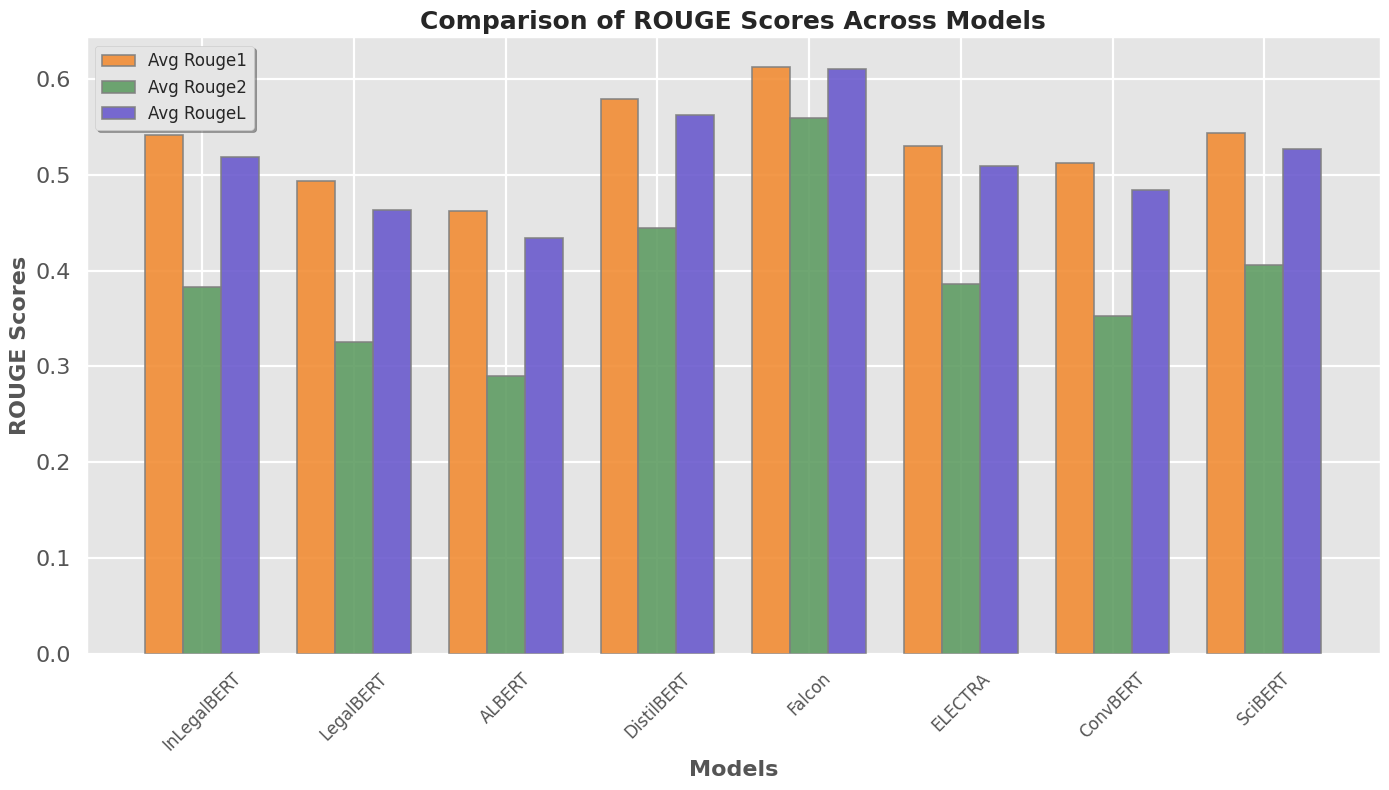

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["InLegalBERT", "LegalBERT", "ALBERT", "DistilBERT", "Falcon", "ELECTRA", "ConvBERT", "SciBERT"]

# ROUGE scores
Avg_Rouge1 = [0.5411, 0.4937, 0.4618, 0.5793, 0.6127, 0.5300, 0.5127, 0.5433]
Avg_Rouge2 = [0.3823, 0.3255, 0.2903, 0.4440, 0.5588, 0.3861, 0.3530, 0.4055]
Avg_RougeL = [0.5184, 0.4630, 0.4344, 0.5628, 0.6107, 0.5093, 0.4840, 0.5266]

# Bar width and positions
bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Set style to 'ggplot' for a polished look
plt.style.use('seaborn-v0_8-poster')

# Create a figure and axis with enhanced size
plt.figure(figsize=(14, 8))

# More attractive color palette with soft pastels and bright accents
plt.bar(r1, Avg_Rouge1, color='#F28D35', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg Rouge1')  # Orange
plt.bar(r2, Avg_Rouge2, color='#5F9C63', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg Rouge2')  # Green
plt.bar(r3, Avg_RougeL, color='#6A5ACD', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg RougeL')  # Slate Blue

# Adding labels and title with enhanced font size and weight
plt.xlabel('Models', fontweight='bold', fontsize=16)
plt.ylabel('ROUGE Scores', fontweight='bold', fontsize=16)
plt.title('Comparison of ROUGE Scores Across Models', fontweight='bold', fontsize=18)

# Positioning xticks in the center of each group of bars with rotation
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, fontsize=12)

# Adding a legend with larger font size and repositioned
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Data
models = ["InLegalBERT", "InLegalBERT vs LegalBERT", "InlegalBERT vs ALBERT", "InLegalBERT vs DistilBERT", "InlegalBERT vs Falcon", "InlegalBERT vs ELECTRA", "InlegalBERT vs ConvBERT", "InlegalBERT vs SciBERT"]

rouge_1_f1 = [0.5411, 0.5020, 0.5000, 0.5741, 0.4024, 0.5835, 0.5497, 0.5895]
rouge_2_f1 = [0.3823, 0.3266, 0.3209, 0.4119, 0.2585, 0.4320, 0.3890, 0.4299]
rouge_l_f1 = [0.5184, 0.4697, 0.4700, 0.5453, 0.3870, 0.5523, 0.5192, 0.5631]

# Create DataFrame
df = pd.DataFrame({
    "Models": models,
    "Rouge 1 F1": Avg_Rouge1,
    "Rouge 2 F1": Avg_Rouge2,
    "Rouge L F1": Avg_RougeL
})

# Display table with formatted float values
df.style.format({
    "Rouge 1 F1": "{:.4f}",
    "Rouge 2 F1": "{:.4f}",
    "Rouge L F1": "{:.4f}"
})


,Models,Rouge 1 F1,Rouge 2 F1,Rouge L F1
0,InLegalBERT,0.5411,0.3823,0.5184
1,InLegalBERT vs LegalBERT,0.4937,0.3255,0.4630
2,InlegalBERT vs ALBERT,0.4618,0.2903,0.4344
3,InLegalBERT vs DistilBERT,0.5793,0.4440,0.5628
4,InlegalBERT vs Falcon,0.6127,0.5588,0.6107
5,InlegalBERT vs ELECTRA,0.5300,0.3861,0.5093
6,InlegalBERT vs ConvBERT,0.5127,0.3530,0.4840
7,InlegalBERT vs SciBERT,0.5433,0.4055,0.5266


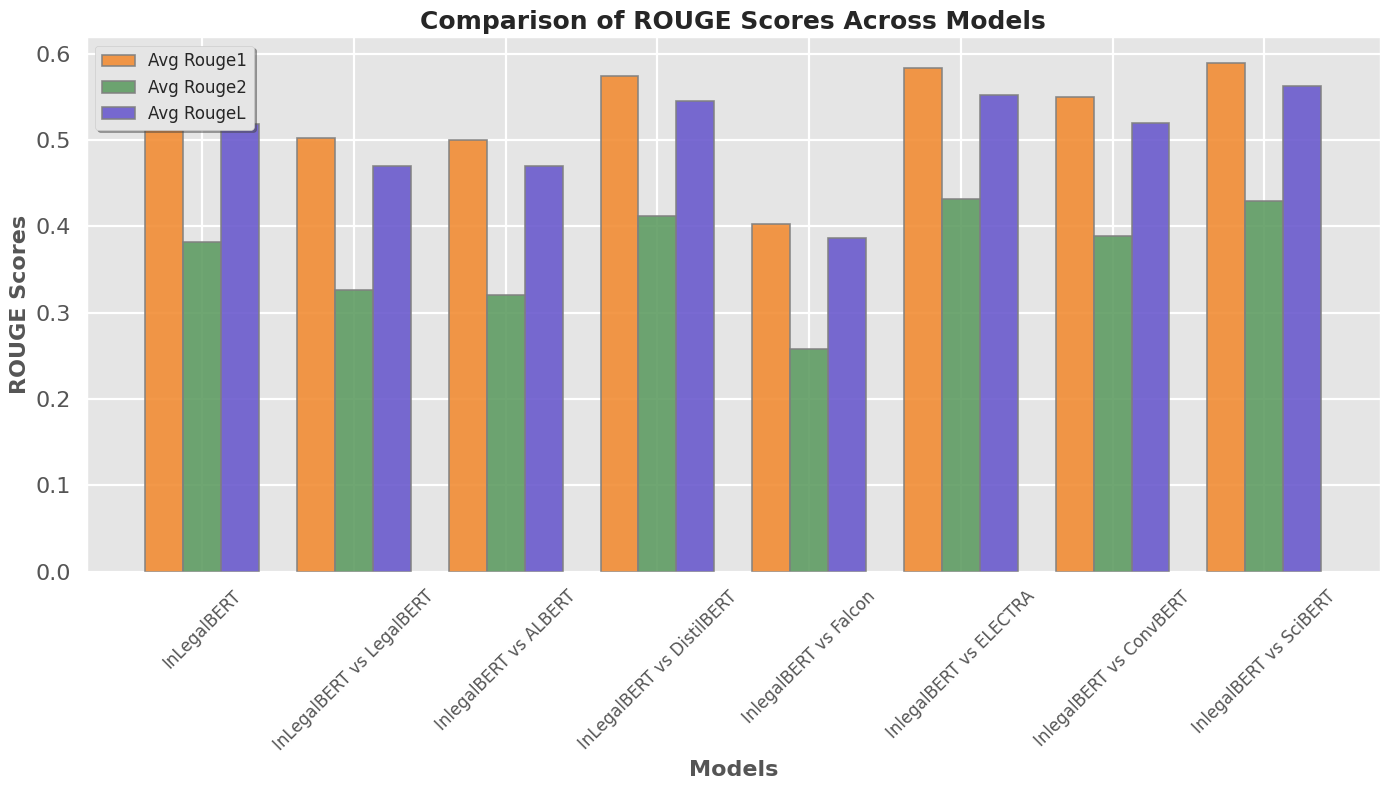

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["InLegalBERT", "InLegalBERT vs LegalBERT", "InlegalBERT vs ALBERT", "InLegalBERT vs DistilBERT", "InlegalBERT vs Falcon", "InlegalBERT vs ELECTRA", "InlegalBERT vs ConvBERT", "InlegalBERT vs SciBERT"]

rouge_1_f1 = [0.5411, 0.5020, 0.5000, 0.5741, 0.4024, 0.5835, 0.5497, 0.5895]
rouge_2_f1 = [0.3823, 0.3266, 0.3209, 0.4119, 0.2585, 0.4320, 0.3890, 0.4299]
rouge_l_f1 = [0.5184, 0.4697, 0.4700, 0.5453, 0.3870, 0.5523, 0.5192, 0.5631]

# Bar width and positions
bar_width = 0.25
r1 = np.arange(len(models))  # Positions for ROUGE-1 bars
r2 = [x + bar_width for x in r1]  # Positions for ROUGE-2 bars (middle bars)
r3 = [x + bar_width for x in r2]  # Positions for ROUGE-L bars (last bars)

# Set style to 'seaborn-v0_8-poster' for a polished look
plt.style.use('seaborn-v0_8-poster')

# Create a figure and axis with enhanced size
plt.figure(figsize=(14, 8))

# More attractive color palette with soft pastels and bright accents
plt.bar(r1, rouge_1_f1, color='#F28D35', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg Rouge1')  # Orange
plt.bar(r2, rouge_2_f1, color='#5F9C63', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg Rouge2')  # Green
plt.bar(r3, rouge_l_f1, color='#6A5ACD', alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.2, label='Avg RougeL')  # Slate Blue

# Adding labels and title with enhanced font size and weight
plt.xlabel('Models', fontweight='bold', fontsize=16)
plt.ylabel('ROUGE Scores', fontweight='bold', fontsize=16)
plt.title('Comparison of ROUGE Scores Across Models', fontweight='bold', fontsize=18)

# Positioning xticks under the middle bars (ROUGE-2) with rotation
plt.xticks(r2, models, rotation=45, ha="center", fontsize=12)

# Adding a legend with larger font size and repositioned
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


## **Accuracy Charts**

In [28]:
import pandas as pd

# Data
models = ["InLegalBERT", "LegalBERT", "ALBERT", "DistilBERT", "Falcon", "ELECTRA", "ConvBERT", "SciBERT"]
accuracies = [0.8667, 0.6667, 0.6667, 0.9333, 0.6667, 0.9333, 0.7333, 1.000]

# Create DataFrame
df = pd.DataFrame({
    "Models": models,
    "Accuracy": accuracies
})

# Display table with formatted float values
df.style.format({
    "Accuracy": "{:.4f}"
})


,Models,Accuracy
0,InLegalBERT,0.8667
1,LegalBERT,0.6667
2,ALBERT,0.6667
3,DistilBERT,0.9333
4,Falcon,0.6667
5,ELECTRA,0.9333
6,ConvBERT,0.7333
7,SciBERT,1.0000


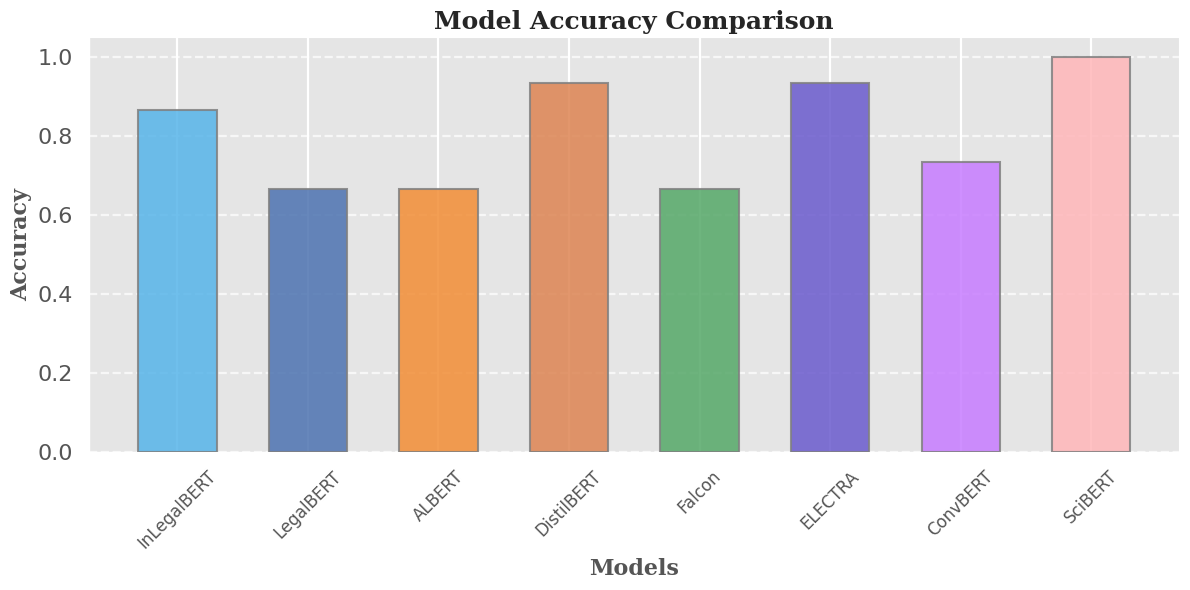

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["InLegalBERT", "LegalBERT", "ALBERT", "DistilBERT", "Falcon", "ELECTRA", "ConvBERT", "SciBERT"]

# Accuracies of the models
accuracies = [0.8667, 0.6667, 0.6667, 0.9333, 0.6667, 0.9333, 0.7333, 1.000]

# Bar width and positions
bar_width = 0.6
r1 = np.arange(len(models))

# Set style to 'seaborn-v0_8-poster' for a polished look
plt.style.use('seaborn-v0_8-poster')

# Create a figure and axis with enhanced size
plt.figure(figsize=(12, 6))

# Choosing attractive colors (gradient blue for the bars)
colors = ['#56B4E9', '#4C72B0', '#F28D35', '#DD8452', '#55A868', '#6A5ACD', '#C77CFF', '#FFB6B9']

# Plotting the accuracies as a bar chart with added features for attractiveness
bars = plt.bar(r1, accuracies, color=colors, alpha=0.85, width=bar_width, edgecolor='grey', linewidth=1.5)

# Adding labels and title with enhanced font size and weight
plt.xlabel('Models', fontweight='bold', fontsize=16, family='serif')
plt.ylabel('Accuracy', fontweight='bold', fontsize=16, family='serif')
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize=18, family='serif')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding shadow effect to the bars
for bar in bars:
    bar.set_zorder(3)

# Positioning xticks in the center with rotation
plt.xticks(r1, models, rotation=45, ha="center", fontsize=12)

# Adding a box around the plot
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

# Show the plot with tight layout
plt.tight_layout()

# Display the graph
plt.show()


In [29]:
import pandas as pd

# Data
models = ["InLegalBERT", "InLegalBERT vs LegalBERT", "InlegalBERT vs ALBERT", "InLegalBERT vs DistilBERT", 
          "InlegalBERT vs Falcon", "InlegalBERT vs ELECTRA", "InlegalBERT vs ConvBERT", "InlegalBERT vs SciBERT"]
accuracies = [0.8667, 0.7333, 0.8667, 0.9333, 0.4667, 0.9333, 0.9333, 0.8667]

# Create DataFrame
df = pd.DataFrame({
    "Models": models,
    "Accuracy": accuracies
})

# Display table with formatted float values
df.style.format({
    "Accuracy": "{:.4f}"
})


,Models,Accuracy
0,InLegalBERT,0.8667
1,InLegalBERT vs LegalBERT,0.7333
2,InlegalBERT vs ALBERT,0.8667
3,InLegalBERT vs DistilBERT,0.9333
4,InlegalBERT vs Falcon,0.4667
5,InlegalBERT vs ELECTRA,0.9333
6,InlegalBERT vs ConvBERT,0.9333
7,InlegalBERT vs SciBERT,0.8667


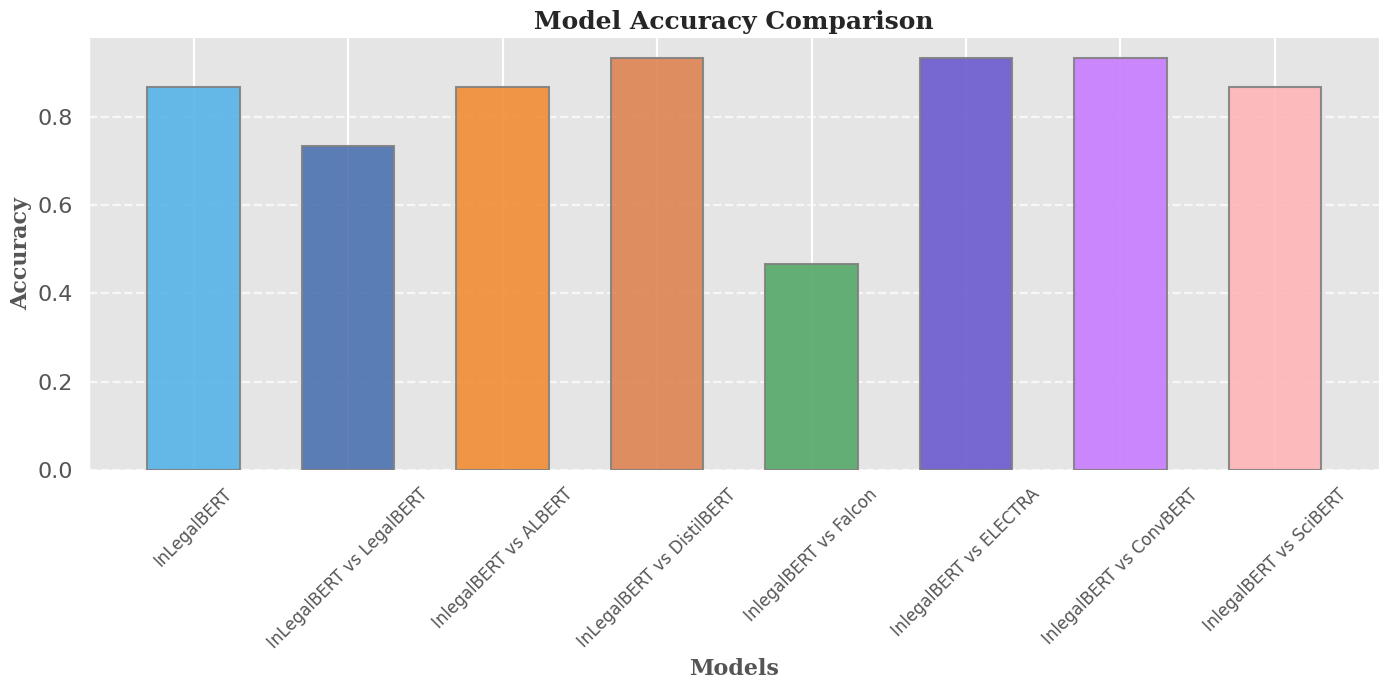

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["InLegalBERT", "InLegalBERT vs LegalBERT", "InlegalBERT vs ALBERT", "InLegalBERT vs DistilBERT", "InlegalBERT vs Falcon", "InlegalBERT vs ELECTRA", "InlegalBERT vs ConvBERT", "InlegalBERT vs SciBERT"]

# Accuracies of the models (example values, replace with actual accuracies)
accuracies = [0.8667, 0.7333, 0.8667, 0.9333, 0.4667, 0.9333, 0.9333, 0.8667]

# Bar width and positions
bar_width = 0.6
r1 = np.arange(len(models))

# Set style to 'seaborn-v0_8-poster' for a polished look
plt.style.use('seaborn-v0_8-poster')

# Create a figure and axis with enhanced size
plt.figure(figsize=(14, 7))

# Choosing a more vibrant color palette with gradients
colors = ['#56B4E9', '#4C72B0', '#F28D35', '#DD8452', '#55A868', '#6A5ACD', '#C77CFF', '#FFB6B9']

# Plotting the accuracies as a bar chart with attractive design
bars = plt.bar(r1, accuracies, color=colors, alpha=0.9, width=bar_width, edgecolor='grey', linewidth=1.5)

# Adding labels and title with enhanced font size and weight
plt.xlabel('Models', fontweight='bold', fontsize=16, family='serif')
plt.ylabel('Accuracy', fontweight='bold', fontsize=16, family='serif')
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize=18, family='serif')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding shadow effect to the bars
for bar in bars:
    bar.set_zorder(3)

# Positioning xticks in the center with rotation
plt.xticks(r1, models, rotation=45, ha="center", fontsize=12)

# Adding a box around the plot for better focus
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

# Show the plot with tight layout
plt.tight_layout()

# Display the graph
plt.show()
